In [1]:
###############################MULTILINEAR REGRESSION###############################

In [72]:
###############################IMPORTING FILE################################# 
import pandas as pd
df = pd.read_csv("ToyataCorolla.csv")
df.head()
df.shape

(1436, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


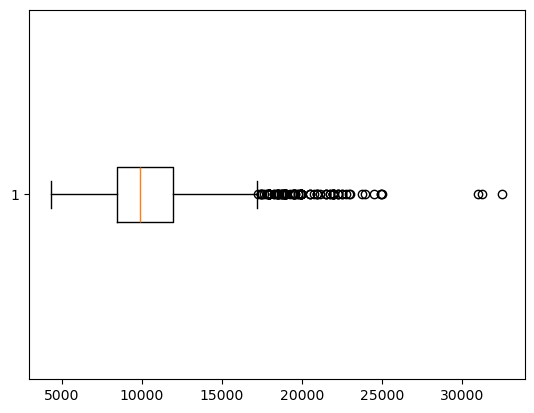

In [4]:
#############################################EDA#######################################
import matplotlib.pyplot as plt
plt.boxplot(df["Price"],vert = False)
plt.show()


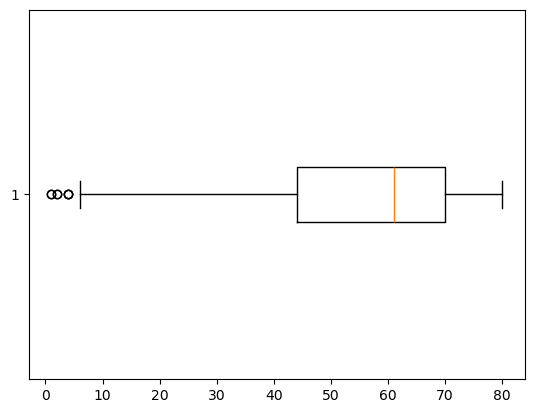

In [5]:
import matplotlib.pyplot as plt
plt.boxplot(df["Age_08_04"],vert = False)
plt.show()

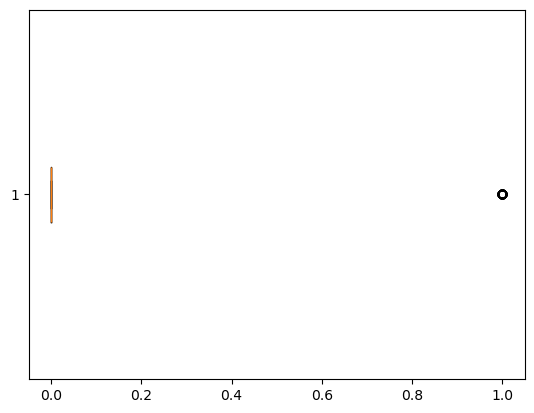

In [6]:
import matplotlib.pyplot as plt
plt.boxplot(df["Automatic"],vert = False)
plt.show()

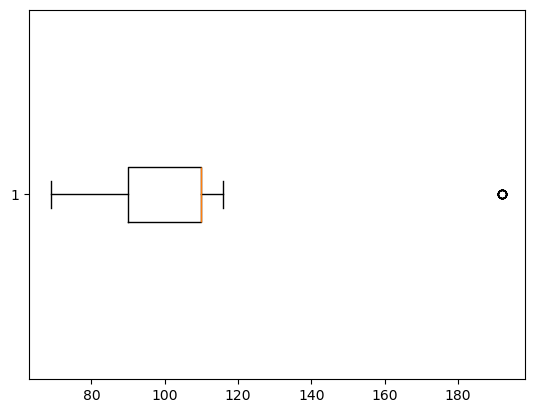

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(df["HP"],vert = False)
plt.show()

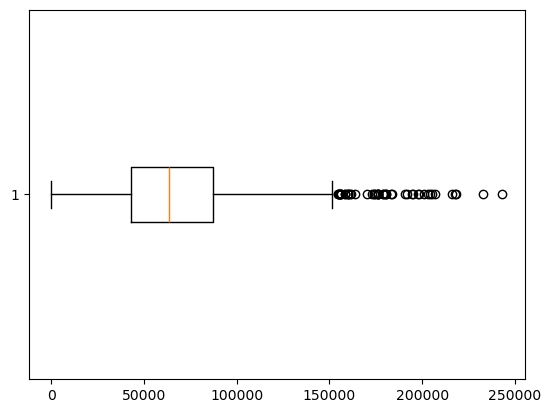

In [8]:
import matplotlib.pyplot as plt
plt.boxplot(df["KM"],vert = False)
plt.show()

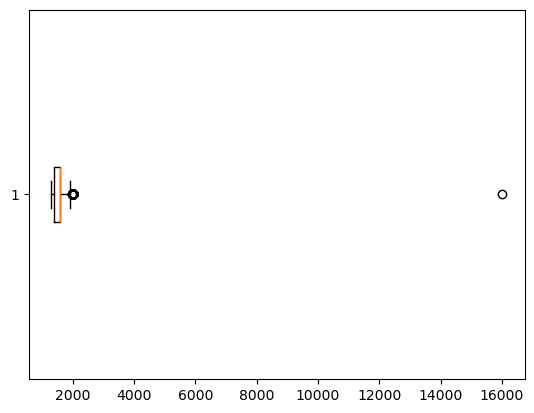

In [9]:
import matplotlib.pyplot as plt
plt.boxplot(df["cc"],vert = False)
plt.show()

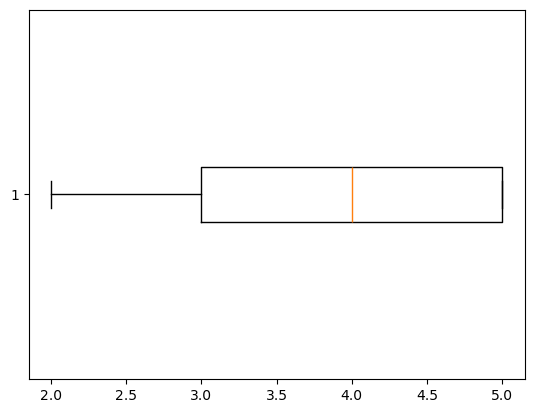

In [10]:
import matplotlib.pyplot as plt
plt.boxplot(df["Doors"],vert = False)
plt.show()

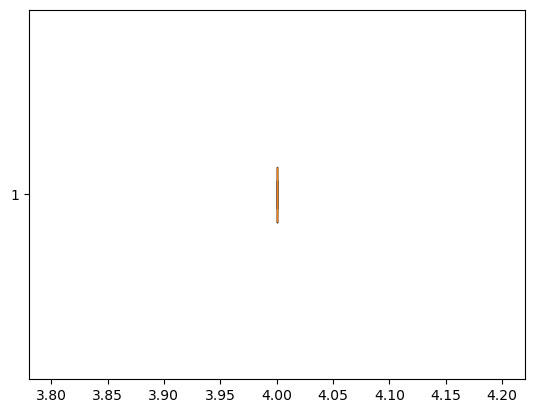

In [11]:
import matplotlib.pyplot as plt
plt.boxplot(df["Cylinders"],vert = False)
plt.show()

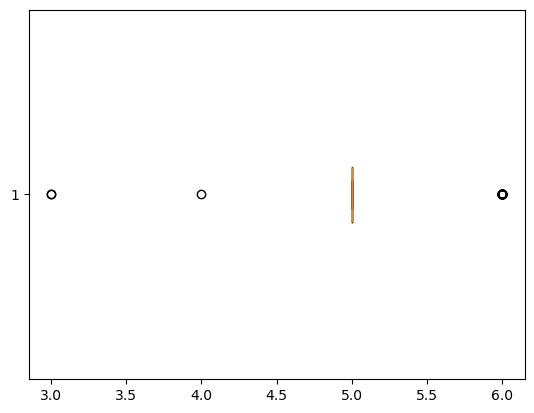

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(df["Gears"],vert = False)
plt.show()

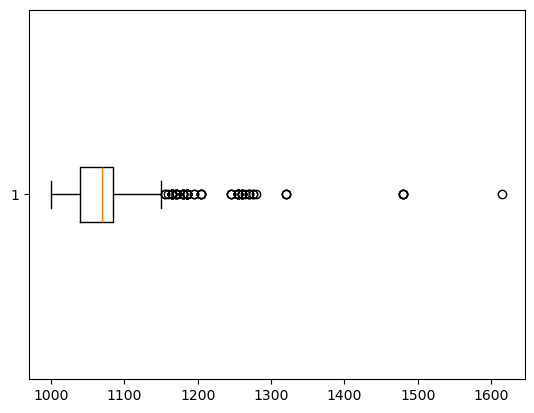

In [13]:
import matplotlib.pyplot as plt
plt.boxplot(df["Weight"],vert = False)
plt.show()

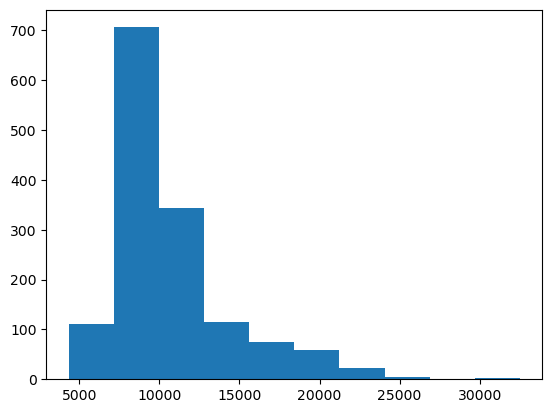

In [14]:
plt.hist(df["Price"])
plt.show()

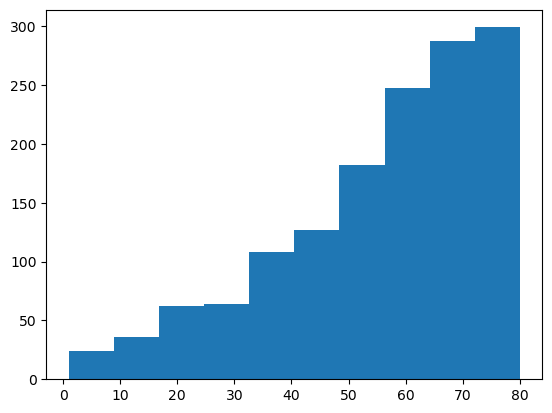

In [15]:
plt.hist(df["Age_08_04"])
plt.show()

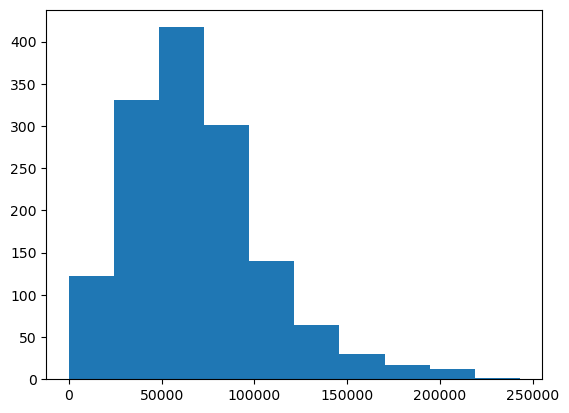

In [16]:
plt.hist(df["KM"])
plt.show()

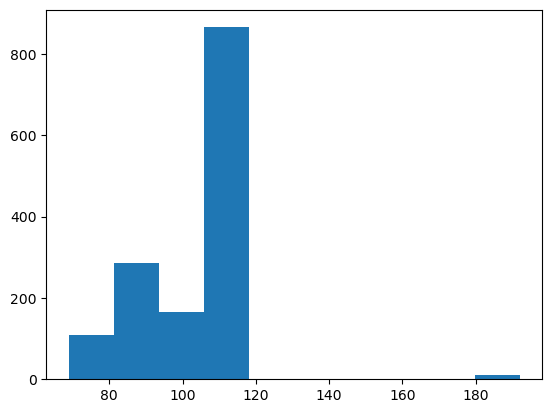

In [17]:
plt.hist(df["HP"])
plt.show()

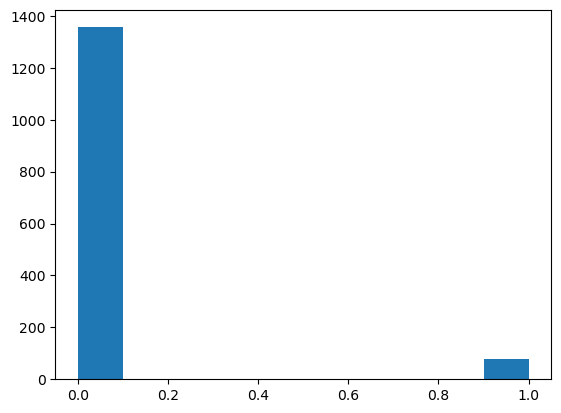

In [18]:
plt.hist(df["Automatic"])
plt.show()

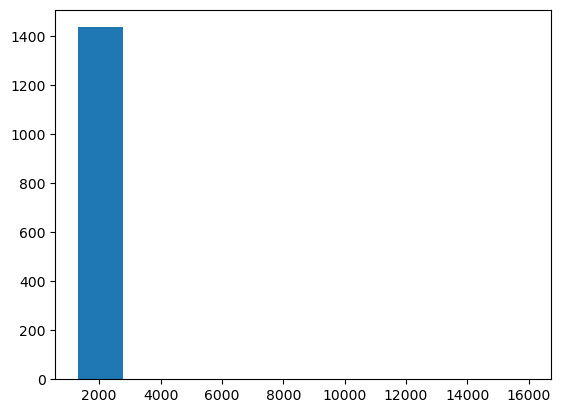

In [19]:
plt.hist(df["cc"])
plt.show()

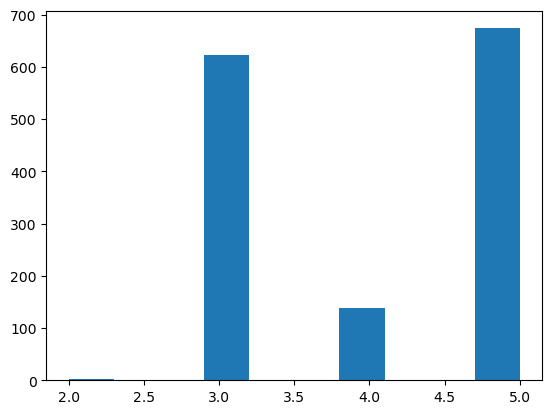

In [20]:
plt.hist(df["Doors"])
plt.show()

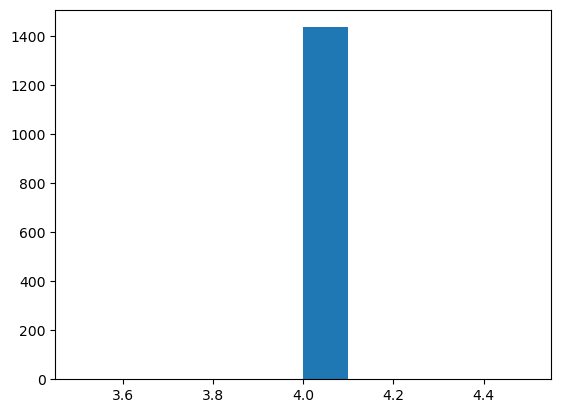

In [21]:
plt.hist(df["Cylinders"])
plt.show()

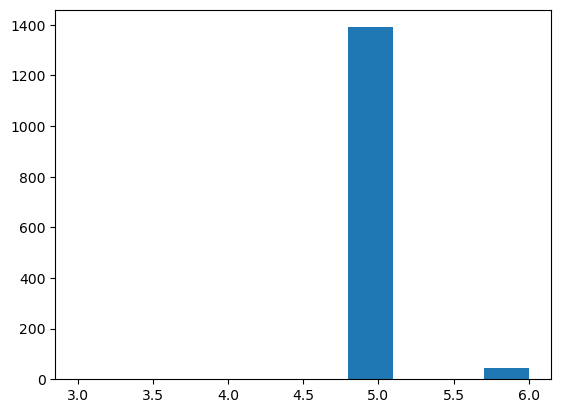

In [22]:
plt.hist(df["Gears"])
plt.show()

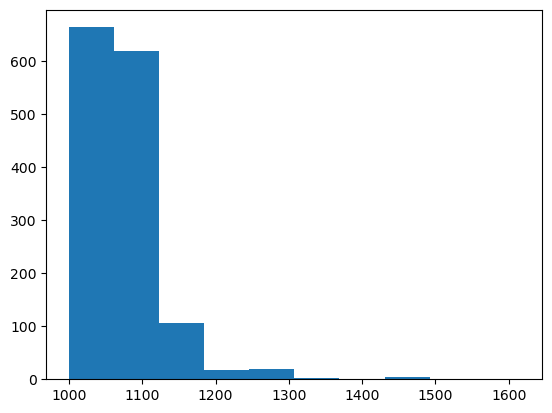

In [23]:
plt.hist(df["Weight"])
plt.show()

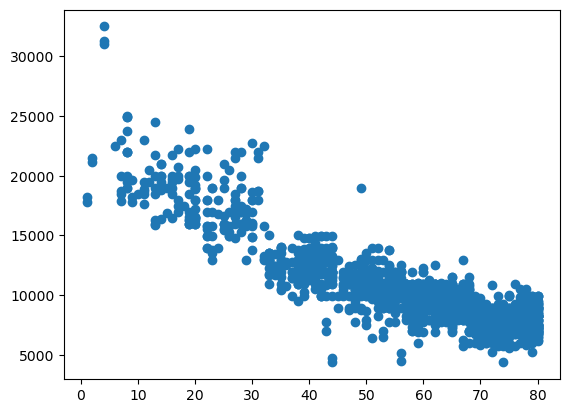

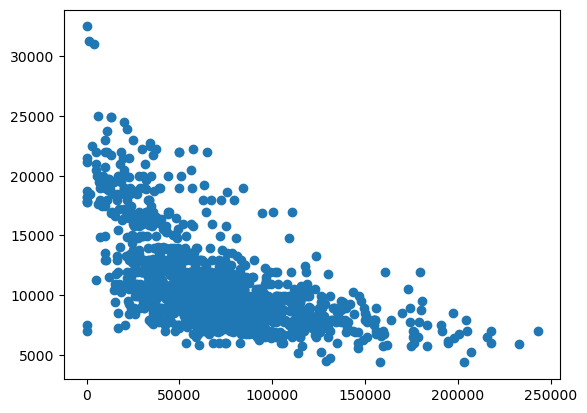

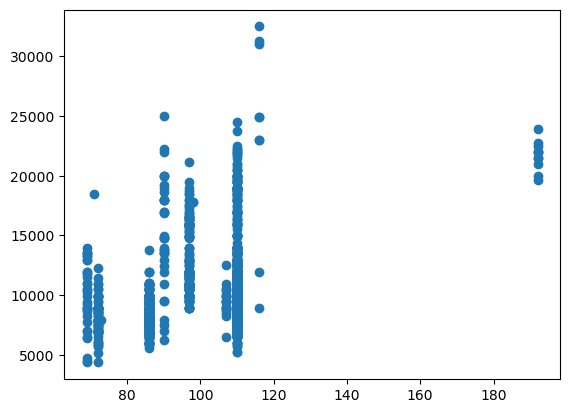

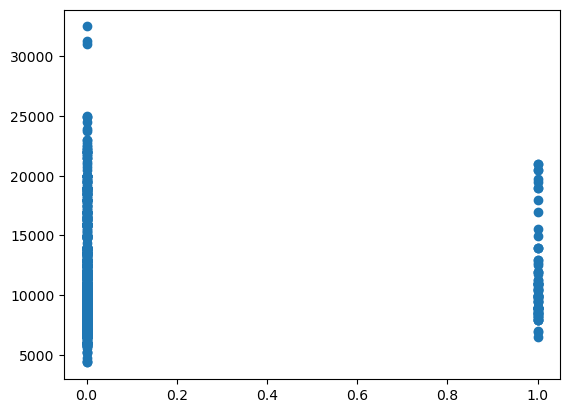

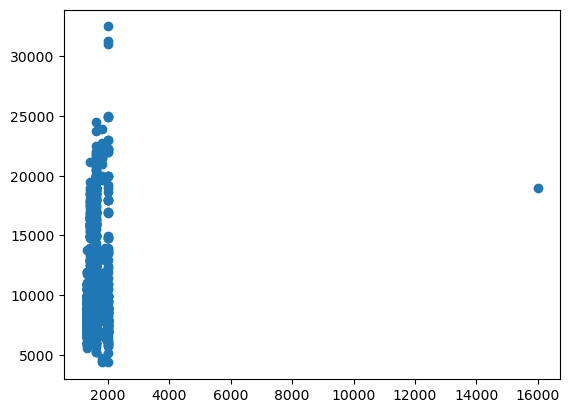

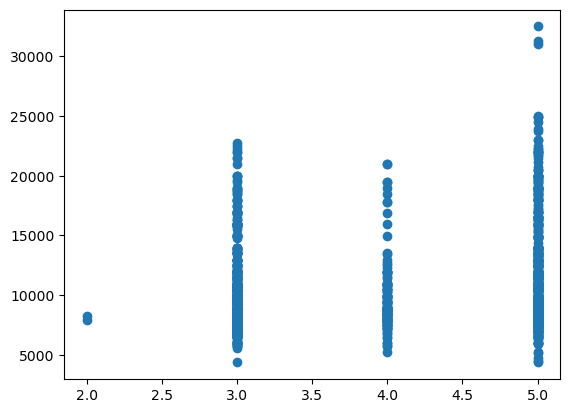

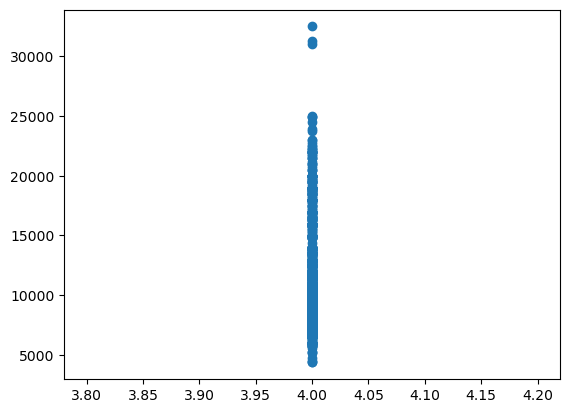

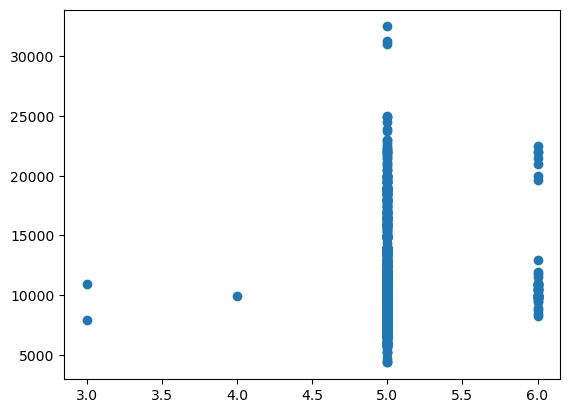

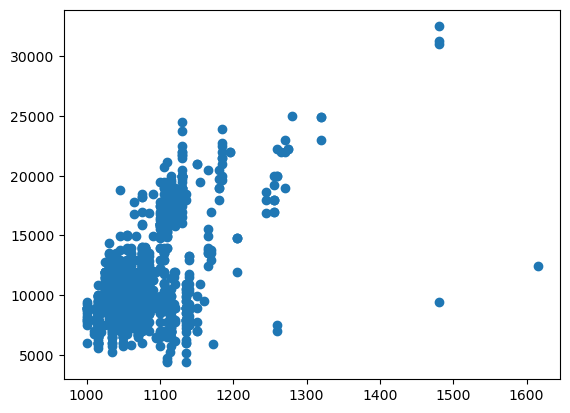

In [24]:
import matplotlib.pyplot as plt
plt.scatter(df["Age_08_04"],df["Price"])
plt.show()
##km
plt.scatter(df["KM"],df["Price"])
plt.show()
##HP
plt.scatter(df["HP"],df["Price"])
plt.show()
##Automatic
plt.scatter(df["Automatic"],df["Price"])
plt.show()
##cc
plt.scatter(df["cc"],df["Price"])
plt.show()
##Doors
plt.scatter(df["Doors"],df["Price"])
plt.show()
##Cylinder
plt.scatter(df["Cylinders"],df["Price"])
plt.show()

plt.scatter(df["Gears"],df["Price"])
plt.show()

plt.scatter(df["Weight"],df["Price"])
plt.show()

In [2]:
# Identify numerical columns
numerical_cols = ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']

# Calculate correlation with the target variable 'Price'
numerical_corr = df[numerical_cols + ['Price']].corr(method='pearson')
target_corr_numerical = numerical_corr['Price'].drop('Price')
target_corr_numerical

Age_08_04   -0.876590
KM          -0.569960
HP           0.314990
Automatic    0.033081
cc           0.126389
Doors        0.185326
Cylinders         NaN
Gears        0.063104
Weight       0.581198
Name: Price, dtype: float64

In [3]:
# Perform ANOVA to see the relationship between the categorical column and the target variable
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create the model and perform ANOVA
model = ols('Price ~ C(Fuel_Type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Fuel_Type),8.177008e+07,2.0,3.117148,0.044584
Residual,1.879547e+10,1433.0,NaN,NaN


In [4]:
#Data Transformation
#Standatrdzition for Numerical Columns
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
#numerical data
df_nom = df[['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight','Price']]

In [5]:
df_nom['Age_08_04'] = SS.fit_transform(df_nom[['Age_08_04']])
df_nom['KM'] = SS.fit_transform(df_nom[['KM']])
df_nom['HP'] = SS.fit_transform(df_nom[['HP']])
df_nom['Automatic'] = SS.fit_transform(df_nom[['Automatic']])
df_nom['cc'] = SS.fit_transform(df_nom[['cc']])
df_nom['Doors'] = SS.fit_transform(df_nom[['Doors']])
df_nom['Cylinders'] = SS.fit_transform(df_nom[['Cylinders']])
df_nom['Gears'] = SS.fit_transform(df_nom[['Gears']])
df_nom['Weight'] = SS.fit_transform(df_nom[['Weight']])
df_nom['Price'] = SS.fit_transform(df_nom[['Price']])
df_nom.head()

C:\Users\LOCHAN RISHITHA\AppData\Local\Temp\ipykernel_19724\1574609816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nom['Age_08_04'] = SS.fit_transform(df_nom[['Age_08_04']])
C:\Users\LOCHAN RISHITHA\AppData\Local\Temp\ipykernel_19724\1574609816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nom['KM'] = SS.fit_transform(df_nom[['KM']])
C:\Users\LOCHAN RISHITHA\AppData\Local\Temp\ipykernel_19724\1574609816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Price
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,0.763763
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,0.832715
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,0.887877
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1.163685
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,0.832715


In [7]:
#Labelencoding categorical Columns
from sklearn.preprocessing import  LabelEncoder
LE = LabelEncoder()
X_cat=LE.fit_transform(df["Fuel_Type"])
X_cat

array([1, 1, 1, ..., 2, 2, 2])

In [8]:
df_cat = pd.DataFrame(X_cat, columns=['Fuel Type '])
df_cat

,Fuel Type
0,1
1,1
2,1
3,1
4,1
...,...
1431,2
1432,2
1433,2
1434,2


In [9]:
df_X=pd.concat([df_nom,df_cat],axis=1)
df_X

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Price,Fuel Type
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,0.763763,1
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,0.832715,1
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,0.887877,1
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1.163685,1
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,0.832715,1
...,...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883,-0.891089,2
1432,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,0.031491,2
1433,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.615281,2
1434,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.960042,2


In [10]:
#correlation
df_X.corr().round(3)

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Price,Fuel Type
Age_08_04,1.000,0.506,-0.157,0.032,-0.098,-0.148,NaN,-0.005,-0.470,-0.877,0.080
KM,0.506,1.000,-0.334,-0.082,0.103,-0.036,NaN,0.015,-0.029,-0.570,-0.421
HP,-0.157,-0.334,1.000,0.013,0.036,0.092,NaN,0.209,0.090,0.315,0.409
Automatic,0.032,-0.082,0.013,1.000,0.067,-0.028,NaN,-0.099,0.057,0.033,0.070
cc,-0.098,0.103,0.036,0.067,1.000,0.080,NaN,0.015,0.336,0.126,-0.277
Doors,-0.148,-0.036,0.092,-0.028,0.080,1.000,NaN,-0.160,0.303,0.185,-0.027
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.005,0.015,0.209,-0.099,0.015,-0.160,NaN,1.000,0.021,0.063,0.070
Weight,-0.470,-0.029,0.090,0.057,0.336,0.303,NaN,0.021,1.000,0.581,-0.505
Price,-0.877,-0.570,0.315,0.033,0.126,0.185,NaN,0.063,0.581,1.000,-0.022


In [64]:
#Droping target varaible
df_new=df_X.drop(df_X.columns[9],axis=1)


In [65]:
df_new

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel Type
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,1
...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883,2
1432,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,2
1433,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,2
1434,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,2


In [13]:
Y = df["Price"]
Y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [14]:
#Spliting the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_new,Y,test_size=0.20)

In [15]:
X_train.shape

(1148, 10)

In [16]:
X_test.shape

(288, 10)

In [ ]:
#Build a multiple linear regression model using the training dataset. 
#Interpret the coefficients of the model. Build minimum of 3 different models.

In [25]:
#MODEL 1
Y = df["Price"]
df_new= df_new[['Age_08_04']]

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(df_new,Y)
Y_pred = LR.predict(df_new)


from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
mse =mean_squared_error(Y,Y_pred)
print("Mean square error:",mse.round(3))
print(" Root Mean square error:",np.sqrt(mse).round(3))
print("R square:",r2_score(Y,Y_pred).round(3))

Mean square error: 3044403.459
 Root Mean square error: 1744.822
R square: 0.768


In [28]:
#MODEL 2
Y = df["Price"]
df_new = df_new[['Age_08_04','Weight']]

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(df_new,Y)
Y_pred = LR.predict(df_new)


from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
mse =mean_squared_error(Y,Y_pred)
print("Mean square error:",mse.round(3))
print(" Root Mean square error:",np.sqrt(mse).round(3))
print("R square:",r2_score(Y,Y_pred).round(3))

Mean square error: 2562472.821
 Root Mean square error: 1600.773
R square: 0.805


In [31]:
#MODEL 3
Y = df["Price"]
df_new = df_new[['Age_08_04','Weight','KM']]

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(df_new,Y)
Y_pred = LR.predict(df_new)


from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
mse =mean_squared_error(Y,Y_pred)
print("Mean square error:",mse.round(3))
print(" Root Mean square error:",np.sqrt(mse).round(3))
print("R square:",r2_score(Y,Y_pred).round(3))

Mean square error: 1996777.761
 Root Mean square error: 1413.074
R square: 0.848


In [36]:
#MODEL 4
Y = df["Price"]
df_new = df_new[['Age_08_04','Weight','KM','HP']]

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(df_new,Y)
Y_pred = LR.predict(df_new)


from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
mse =mean_squared_error(Y,Y_pred)
print("Mean square error:",mse.round(3))
print(" Root Mean square error:",np.sqrt(mse).round(3))
print("R square:",r2_score(Y,Y_pred).round(3))

Mean square error: 1817054.528
 Root Mean square error: 1347.982
R square: 0.862


In [40]:
#MODEL 5
Y = df["Price"]
df_new = df_new[['Age_08_04','Weight','KM','HP','Doors']]

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(df_new,Y)
Y_pred = LR.predict(df_new)


from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
mse =mean_squared_error(Y,Y_pred)
print("Mean square error:",mse.round(3))
print(" Root Mean square error:",np.sqrt(mse).round(3))
print("R square:",r2_score(Y,Y_pred).round(3))

Mean square error: 1816100.455
 Root Mean square error: 1347.628
R square: 0.862


In [97]:
Y=df["Age_08_04"]
X=df[["Weight"]]
import statsmodels.formula.api as smf
model=smf.ols('Y~X',data=df).fit()
model.summary()
model.rsquared.round(2)
r2=model.rsquared
VIF=1/(1-r2)
print("VIF value: ",VIF)

VIF value:  1.2839245890191988


In [98]:
Y =df['Age_08_04']
X = df[['HP']]

import statsmodels.formula.api as smf
model =smf.ols('Y ~ X',data=df).fit()
model.summary()
model.rsquared.round(2)
r2 = model.rsquared
VIF = 1/ (1-r2)
print('VIF value',VIF)

VIF value 1.0251473326599272


In [99]:
Y =df['Age_08_04']
X = df[['KM']]

import statsmodels.formula.api as smf
model =smf.ols('Y ~ X',data=df).fit()
model.summary()
model.rsquared.round(2)
r2 = model.rsquared
VIF = 1/ (1-r2)
print('VIF value',VIF)

VIF value 1.3435521293062285


In [100]:
Y =df['HP']
X = df[['KM']]

import statsmodels.formula.api as smf
model =smf.ols('Y ~ X',data=df).fit()
model.summary()
model.rsquared.round(2)
r2 = model.rsquared
VIF = 1/ (1-r2)
print('VIF value',VIF)

VIF value 1.125172722985646


In [101]:
Y =df['Weight']
X = df[['KM']]

import statsmodels.formula.api as smf
model =smf.ols('Y ~ X',data=df).fit()
model.summary()
model.rsquared.round(2)
r2 = model.rsquared
VIF = 1/ (1-r2)
print('VIF value',VIF)

VIF value 1.0008185411887265


In [102]:
Y =df['HP']
X = df[['Weight']]

import statsmodels.formula.api as smf
model =smf.ols('Y ~ X',data=df).fit()
model.summary()
model.rsquared.round(2)
r2 = model.rsquared
VIF = 1/ (1-r2)
print('VIF value',VIF)

VIF value 1.008095693559618


In [103]:

# FINALIZED VARIABLE
Y = df['Price']
X = df[['Age_08_04','Weight','KM','HP']]
import statsmodels.formula.api as smf
model =smf.ols('Y ~ X',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2230.
Date:                Thu, 11 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:42:37   Log-Likelihood:                -12386.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1431   BIC:                         2.481e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4014.6418    936.044     -4.289      0.000   -5850.808   -2178.476
X[0]        -122.4245      2.623    -46.668      0.000    -127.570    -117.278
X[1]          18.5319      0.803     23.084      0.000      16.957      20.107
X[2]          -0.0196      0.001    -16.271      0.000      -0.022      -0.017
X[3]          30.2119      2.539     11.897      0.000      25.230      35.193
==============================================================================
Omnibus:                      197.115   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1498.712
Skew:                          -0.384   Prob(JB):                         0.00
Kurtosis:                       7.946   Cond. No.                     2.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
#residual analysis
import statsmodels.formula.api as smf
model.resid #y -y pred


0      -3055.144943
1      -2295.276927
2      -2586.360171
3      -1217.949137
4      -2207.560290
           ...     
1431   -1227.825040
1432    2639.431557
1433     133.026774
1434   -1241.362429
1435   -3698.891443
Length: 1436, dtype: float64

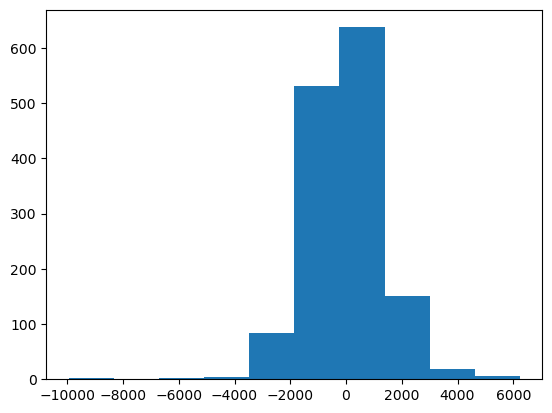

-0.3844687580384154

In [105]:
import matplotlib.pyplot as plt
plt.hist(model.resid)
plt.show()
model.resid.skew()

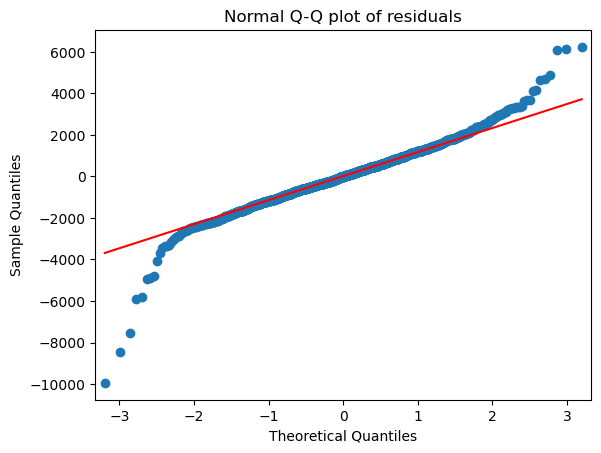

In [106]:
#Q-Q PLOT
#Test for normality od residuals (Q-Q PLOT)
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [107]:
#MODEL DELETION DIAGNOSTICS
## COOK'S DISTANCE
(cooks,pvalue) = model.get_influence().cooks_distance
cooks  


array([4.65612171e-03, 2.75310869e-03, 3.34769910e-03, ...,
       1.16629428e-05, 9.92250611e-04, 1.62225890e-02])

In [108]:
cooks = pd.DataFrame(cooks)

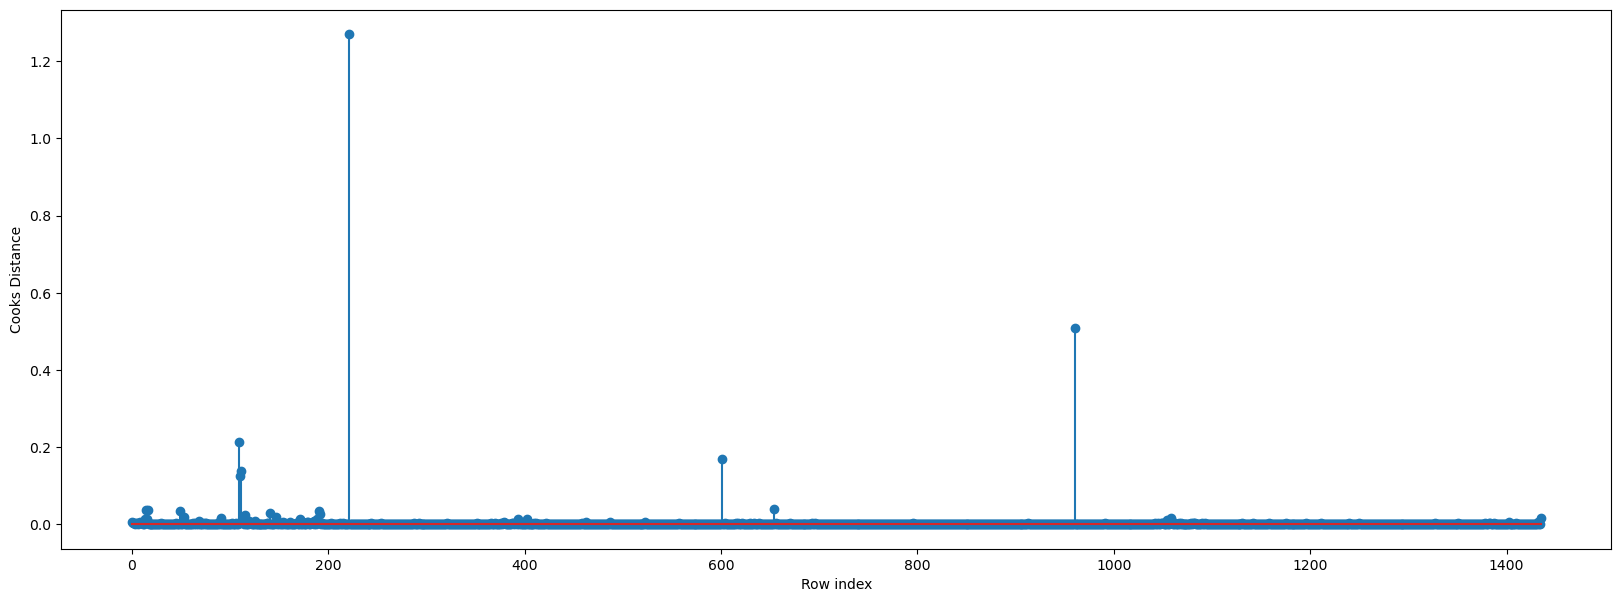

In [109]:

import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(cooks[0], 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [112]:
# Leverage cutoff value
k = df_new.shape[1]
n = df_new.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff


0.02298050139275766

In [88]:
# points which are greater than leverage value treated as influencer observations
cooks[0][cooks[0]>leverage_cutoff]


14     0.037531
16     0.037665
49     0.035356
109    0.213647
110    0.123966
111    0.137230
115    0.023289
141    0.029482
191    0.035119
192    0.026130
221    1.269940
601    0.168191
654    0.038517
960    0.508615
Name: 0, dtype: float64

In [ ]:
##LASSO AND RIDGE HAD IMPLEMENTED IN TWO SEPERATE FILES.

In [ ]:
#Interview Questions:
#1.What is Normalization & Standardization and how is it helpful?`
#2.What techniques can be used to address multicollinearity in multiple linear regression?

In [ ]:
#Standardisation is calculated by dividing the mean by the standard deviation.
#Normalisation, which entails dividing a vector by its length, converts data into a range between 0 and 1.

In [ ]:
#Normalization or Min-Max Scaling is used to transform features to be on a similar scale. 
# scales the range to [0, 1] or sometimes [-1, 1].
#It is useful when we don’t know about the distribution

In [ ]:
#Standardization or Z-Score Normalization is the transformation of features by subtracting from mean and dividing by standard deviation. 
#This is even called as Z-score.

#X_new = (X - mean)/sigma
#Standardization can be helpful in cases where the data follows a Gaussian distribution.

In [ ]:
#It is useful when the feature distribution is Normal or Gaussian.

In [ ]:
##Strategies to address Multicollinearity:
#Feature Selection:Dropping one of the correlated variables, prioritizing the most relevant. 

#Collect More Data:Increase our sample size in order to reduce the impact of multicollinearity.

#Transform Variables:
#Applying the mathematical transformations like standardization/normalization to thevariables. 
#we can also use the dimensionality reduction techniques like Principal Component Analysis (PCA) 

#Ridge or Lasso Regression:can implement the regularization techniques like Ridge or Lasso regression, 
#in order to reduce the impact of multicollinearity. 

#Variance Inflation Factor (VIF):Calculate the VIF scores for each variable; if VIF > 10, consider removing variables.
#vif<5 we can consider the model.

#Cross-Validation:Use cross-validation techniques for evaluating model's performance and 
#observe any if multicollinearity is negatively affecting predictions.